In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load Telco data here**

In [19]:
DIR = "../data/"
telco_data = pd.read_csv(DIR+'telco_filtered_data.csv')
# data.columns = ['a', 'long', 'lat', 'y']
# data.drop('a', axis=1).to_csv(DIR, index = False)
telco_data.head()
telco_data.shape

(4911, 3)

In [20]:
# data.groupby(['long','lat']).size()#.reset_index(name='Freq')

**Fix the training set**

In [21]:
Xtrain = telco_data[['lat', 'long']]
ytrain = telco_data['y']

**Train a KNN Regressor now to predict y from lat - long**
**fix K by using gridsearch and k-fold cross-validation**


In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,telco_data.shape[0])
weight = ['uniform','distance']
param_grid = dict(n_neighbors=k_range, weights=weight)

model = KNN()
grid = GridSearchCV(model,param_grid,cv=10,scoring='neg_mean_squared_error')
grid.fit(Xtrain, ytrain)


**Let's plot the hyperparam-graph**

In [ ]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(k_range), len(weight))

for ind, i in enumerate(k_range):
    plt.plot(weight, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('weight')
plt.ylabel('Mean MSE score')
plt.show()

**Finally, lets print our best score and best parameters**


In [ ]:
print(grid.best_score_)
print(grid.best_params_)

**Now that we found the best value of K, we shall use that to train the using the whole dataset**

In [ ]:
## code here

In [4]:
from sklearn.neighbors import KNeighborsRegressor as KNN


model = KNN(n_neighbors=int(np.sqrt(telco_data.shape[0])))
model.fit(Xtrain, ytrain)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=70, p=2,
          weights='uniform')

**Plot the image**

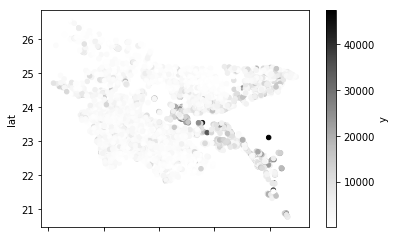

In [5]:
telco_data.plot.scatter(x='long', y='lat', c='y')

**Start creating IFI data here**

**But first create District to lat-long Mapping**

In [6]:
district_coordinates = pd.read_csv(DIR + 'district-coordinate.csv')
district_coordinates.head()

district_coordinates['mean_lat'] = (district_coordinates['Latitude'] + district_coordinates['Latitude.1'])/2
district_coordinates['mean_long'] = (district_coordinates['Longitude'] + district_coordinates['Longitude.1'])/2

In [7]:
district_coordinates = district_coordinates[['District', 'mean_lat', 'mean_long']]
district_coordinates.shape
district_coordinates = district_coordinates.sort_values('District')
district_coordinates = district_coordinates.reset_index(drop=True)
district_coordinates.head()

,District,mean_lat,mean_long
0,Bagerhat,22.6055,89.7450
1,Bandarban,21.7750,92.2535
2,Barguna,22.1880,90.1215
3,Barisal,22.7750,90.3270
4,Bhola,22.3970,90.7740


**Now predict district wise y value (using mean lat, long)**

In [8]:
Xtest = district_coordinates[['mean_lat', 'mean_long']]
ytest_pred = model.predict(Xtest)

district_coordinates['y'] = ytest_pred
district_coordinates.head()

,District,mean_lat,mean_long,y
0,Bagerhat,22.6055,89.7450,2753.705714
1,Bandarban,21.7750,92.2535,13432.670000
2,Barguna,22.1880,90.1215,2576.111429
3,Barisal,22.7750,90.3270,4312.155714
4,Bhola,22.3970,90.7740,2014.204286


**Plot the image**

It should look like the image above, only with fewer data points

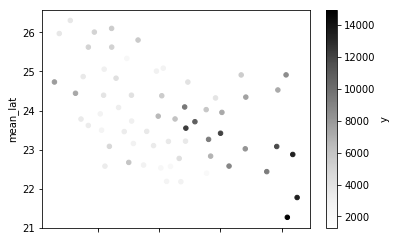

In [9]:
district_coordinates.plot.scatter(x='mean_long', y='mean_lat', c='y')

**Now join this with IFI data**

In [10]:
district_IFI = pd.read_csv(DIR + 'district-IFI.csv')
district_IFI.shape


(64, 10)

In [11]:
district_IFI = district_IFI[['District', '2014']]
district_IFI.columns = ['District', 'IFI']
district_IFI =  district_IFI.sort_values('District')
district_IFI = district_IFI.reset_index(drop=True)
district_IFI.head()


,District,IFI
0,BAGERHAT,0.698
1,BANDARBAN,0.682
2,BARGUNA,0.661
3,BARISAL,0.874
4,BHOLA,0.604


In [12]:
# pd.concat([district_coordinates, district_IFI], keys='District')


In [13]:
############### joining two tables here ####################
district_IFI['y'] = district_coordinates['y']
district_coordinates['IFI'] = district_IFI['IFI']

In [14]:
district_coordinates.head()

,District,mean_lat,mean_long,y,IFI
0,Bagerhat,22.6055,89.7450,2753.705714,0.698
1,Bandarban,21.7750,92.2535,13432.670000,0.682
2,Barguna,22.1880,90.1215,2576.111429,0.661
3,Barisal,22.7750,90.3270,4312.155714,0.874
4,Bhola,22.3970,90.7740,2014.204286,0.604


In [15]:
district_IFI.head()

,District,IFI,y
0,BAGERHAT,0.698,2753.705714
1,BANDARBAN,0.682,13432.670000
2,BARGUNA,0.661,2576.111429
3,BARISAL,0.874,4312.155714
4,BHOLA,0.604,2014.204286


**We have created the data successfully**

**Now we need to find the PCC**

In [16]:
def normalize(x):
    return (x-x.mean())/x.std()
print("Training PCC avg = ", np.corrcoef(normalize(district_IFI['IFI']), district_IFI['y'])[0, 1])


Training PCC avg =  0.25899825548480887


**Plot IFI Heatmap now**

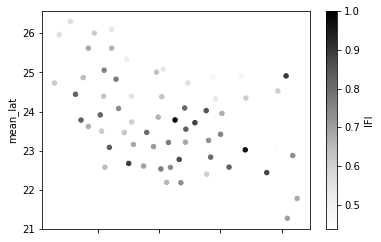

In [17]:
district_coordinates.plot.scatter(x='mean_long', y='mean_lat', c='IFI')